In [34]:
from IPython.display import Markdown, display

display(Markdown("000_independencia_energetica.md"))


## independecia energética de México

1. Figura 1 Oferta interna y produccion de energia primaria 
1. Pregunta: Somos capaces de producir la energia que consumimos ?
1. Figura de independecia energetica
1. Pregunta: De donde viene la energia que no producimos
1. Figura de importacion de energia


In [12]:
import altair as alt
import datetime as dt

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser  import parse
import numpy as np
import datetime

import matplotlib.dates as mdates
import matplotlib as mpl

mpl.rcParams.keys()

mpl.rcParams['lines.linewidth']         = 2
mpl.rcParams['lines.markersize']        = 10
mpl.rcParams['lines.markerfacecolor']   = "white"
mpl.rcParams['font.family']             = 'sans-serif'
mpl.rcParams['font.sans-serif']         = "Tahoma"
mpl.rcParams['font.size']               = 20

# colores
azulier     = "#1A3D6F"
naranjaier  = '#C65C25' 
tamanio = (10.871,5.515)
# mpl.rcParams['lines.linestyle'] = '--'

In [2]:
f   = '../data/independencia.csv'
ind = pd.read_csv(f,index_col=0,parse_dates=True)
ind['Año'] = ind.index.year
ind.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2011-01-01 to 2020-01-01
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Factor                9 non-null      float64
 1   Producción            9 non-null      float64
 2   Consumo               9 non-null      float64
 3   Importación           9 non-null      float64
 4   Oferta Interna Bruta  9 non-null      float64
 5   Año                   9 non-null      int64  
dtypes: float64(5), int64(1)
memory usage: 504.0 bytes


##  2014 fue el último año en que México produjo la misma cantidad de energía que la que consumió.

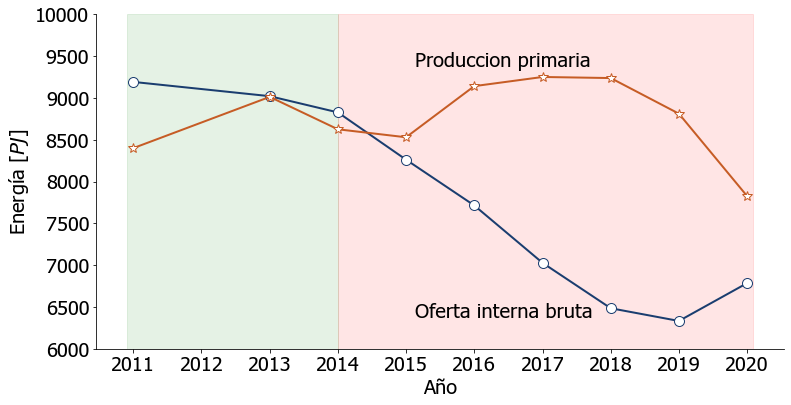

In [32]:
fig, ax = plt.subplots(constrained_layout=True,figsize=tamanio)



ax.plot(ind["Producción"], '-o',
#         label="Producción Primaria",
        color=azulier)

ax.plot(ind["Oferta Interna Bruta"], '-*',
#         label="Oferta Interna Bruta",
        color=naranjaier)

ax.axvspan(parse("2010-12-01"),parse("2013-12-31"),alpha=0.1,color='green')
ax.axvspan(parse("2013-12-31"),parse("2020-01-31"),alpha=0.1,color="r")

ax.set_ylabel("Energía [$PJ$]")
ax.set_xlabel("Año")
ax.set_ylim(6000,10000)



x = [dt.datetime(2014, 12, 1),dt.datetime(2014, 12, 1)]
y = [6200,9200]

ax.annotate('Oferta interna bruta', (mdates.date2num(x[0]), y[0]), xytext=(15, 15), 
            textcoords='offset points')
ax.annotate('Produccion primaria', (mdates.date2num(x[1]), y[1]), xytext=(15, 15), 
            textcoords='offset points')


ax.spines[['top','right']].set_visible(False)

plt.savefig('Fig1.png')

# La independencia energética se calcula con la Producción de energía primaria dividida por la oferta interna bruta de energía

In [ ]:
fig, ax = plt.subplots(constrained_layout=True,figsize=tamanio)

ax.axhline(y=1,c="k",alpha=0.3)
ax.plot(ind.Factor, '-o', ms=10, lw=2, alpha=1, mfc='white',color=azulier)

ax.set_xlim(ind.index[0]-pd.Timedelta(100,"d"),ind.index[-1]+pd.Timedelta(100,"d"))
ax.set_ylim(0,1.2)

ax.axvspan(parse("2011-01-01"),parse("2013-12-31"),alpha=0.1,color="g")
ax.axvspan(parse("2013-12-31"),parse("2020-01-01"),alpha=0.1,color="r")

ax.set_ylabel("Factor de Independencia [-]")
ax.set_xlabel("Año")

ax.spines[['top','right']].set_visible(False)

plt.savefig('Fig2.png')

# A la par, la importación de energía ha ido en aumento

In [ ]:
fig, ax = plt.subplots(constrained_layout=True,figsize=tamanio)

ax.plot(ind.Importación, '-o', ms=10, lw=2, alpha=1, mfc='white',color=azulier)

ax.set_xlim(ind.index[0]-pd.Timedelta(365,"d"),ind.index[-1]+pd.Timedelta(365,"d"))
# ax.set_ylim(0,1.2)

ax.axvspan(parse("2011-01-01"),parse("2013-12-31"),alpha=0.1,color="g")
ax.axvspan(parse("2013-12-31"),parse("2020-12-31"),alpha=0.1,color="r")


ax.set_ylabel("Energía Importada [$PJ$]")
ax.set_xlabel("Año")


ax.spines[['top','right']].set_visible(False)

plt.savefig('Fig3.png')

In [ ]:
fig, ax = plt.subplots(constrained_layout=True,figsize=tamanio)


ax.plot(ind["Producción"], '-o',
        label="Producción Primaria",color=azulier)

ax.plot(ind["Oferta Interna Bruta"], '-*',
        label="Oferta Interna Bruta",color=naranjaier)

ax.axvspan(parse("2011-01-01"),parse("2013-12-31"),alpha=0.1,color=azulier)
ax.axvspan(parse("2013-12-31"),parse("2020-12-31"),alpha=0.1,color="r")


ax.axhline(y=7800,c="r",alpha=0.5)

ax.set_ylabel("Energía [$PJ$]")
ax.set_xlabel("Año")
ax.set_ylim(6000,10000)
ax.legend()


ax.spines[['top','right']].set_visible(False)
plt.savefig('Fig4.png')